## Final Project
### by Bogdan Popa


In the US the media and politicians often blame video games for shootings and other violent crimes. For the final project, I will try to see if there's any correlation between sales of violent video games and violent crimes in the United States.

The plan is to look at the total number of violent video game sales each year and compare it to the total number of violent crimes recorded during the same years in the US.

To filter only the violent video games I will only look at video games in the genres of action and shooters. 

#### The Data

The video games sales data was found at https://www.kaggle.com/datasets/gregorut/videogamesales and all sales are (in millions)

The data regarding violent crimes in the United States was grabbed from the FBI website at https://ucr.fbi.gov/crime-in-the-u.s/2019/crime-in-the-u.s.-2019/topic-pages/violent-crime

The video game dataset has information about game sales between 1980 and 2015 (the data for 2016 is incomplete). The dataset about violent crimes has statistics for the years 2000 to 2019. Therefore for the analysis, I will look at the overlapping data which falls between 2000 and 2015.
 
 ##### Data Limitations
 
1. The video game dataset provides us with the total sales in North America, not the total sales in the United States. Therefore, I am making the assumption that video game sales in the US are changing in similar proportions as the rest of North American countries.

2. We are only looking at the video game genres labeled as "shooters" and "action" as those games usually depict more violence than other genres. 

3. The video game dataset "Year" column refers to the video games release year not the total sales of the said video game during that year. However, most video games reach their peak in popularity during the same year they are released.


### Video Game Sales Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Reading the video games sales dataset
vgsales=pd.read_csv("vgsales.csv")
vgsales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


#### Filtering the data

As you can see the video game data set has a lot of data that we will not use. Therefore, first I will drop all the columns that are not needed for the analysis. We do not need information about individual video games other than their genre, total North American sales, and publication year.


In [2]:
## Dropping the not needed columns
vgsales=vgsales.drop(columns=['Rank','Name','Platform','Publisher','EU_Sales','JP_Sales','Other_Sales','Global_Sales'])
vgsales.head()

,Year,Genre,NA_Sales
0,2006.0,Sports,41.49
1,1985.0,Platform,29.08
2,2008.0,Racing,15.85
3,2009.0,Sports,15.75
4,1996.0,Role-Playing,11.27


Next, we need to filter the data to only show video games in the "shooter" and "action" genres.

In [3]:
## Creating a new dataset with only the violent video games
violentvg=vgsales.loc[vgsales['Genre'].isin(['Shooter','Action'])]
violentvg

,Year,Genre,NA_Sales
9,1984.0,Shooter,26.93
16,2013.0,Action,7.01
17,2004.0,Action,9.43
23,2013.0,Action,9.63
24,2002.0,Action,8.41
...,...,...,...
16582,2001.0,Action,0.01
16583,1999.0,Action,0.01
16585,2011.0,Shooter,0.01
16589,2016.0,Action,0.00


#### Aggregating the Data

For the data to be useful in our analysis we need to combine the total sales of violent video games by year. To do this I will create a new dataset and group data in each year together.


In [4]:
## Grouping all data together and adding a new column to aggregate the sum of all sales per year
vvg_grp=violentvg.groupby(['Year'],as_index=False).agg(Total_Sales=('NA_Sales','sum'))

## Filtering the data for the years 2000 to 2015
vvg_grp=vvg_grp[(vvg_grp['Year']>=2000)&(vvg_grp['Year']<=2015)]
vvg_grp

,Year,Total_Sales
20,2000.0,21.79
21,2001.0,44.92
22,2002.0,76.50
23,2003.0,53.86
24,2004.0,69.41
25,2005.0,77.44
26,2006.0,61.41
27,2007.0,97.78
28,2008.0,107.34
29,2009.0,110.60


Next, I will plot the data to better illustrate the change in the sale of violent video games between the years 2000 and 2015.

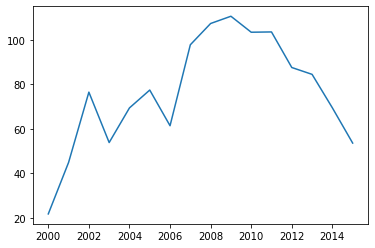

In [5]:
## Plotting the video game sales data
plt.plot(vvg_grp['Year'], vvg_grp['Total_Sales'])
plt.show()

### Violent Crime Data

In [6]:
## Loading the crime data that was obtained from FBI website
crime=pd.read_csv("FBICrimeData.csv")
crime.head()

,Year,Population,Violent crime,Murder and nonnegligent manslaughter,Rape(revised definition),Rape(legacy definition),Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft
0,2000,"281,421,906","1,425,486","15,586",NaN,"90,178","408,016","911,706","10,182,584","2,050,992","6,971,590","1,160,002"
1,2001,"285,317,559","1,439,480","16,037",NaN,"90,863","423,557","909,023","10,437,189","2,116,531","7,092,267","1,228,391"
2,2002,"287,973,924","1,423,677","16,229",NaN,"95,235","420,806","891,407","10,455,277","2,151,252","7,057,379","1,246,646"
3,2003,"290,788,976","1,383,676","16,528",NaN,"93,883","414,235","859,030","10,442,862","2,154,834","7,026,802","1,261,226"
4,2004,"293,656,842","1,360,088","16,148",NaN,"95,089","401,470","847,381","10,319,386","2,144,446","6,937,089","1,237,851"


As you can see the crime data is broken down into different types of violent crime. However, it also includes a column that has the total violent crime reported each year.

For the analysis, I will create a new data frame that includes only the data I need, "year" and "Violent Crime".


In [7]:
vcrime = crime[['Year', 'Violent crime']].copy()
vcrime.head()

,Year,Violent crime
0,2000,"1,425,486"
1,2001,"1,439,480"
2,2002,"1,423,677"
3,2003,"1,383,676"
4,2004,"1,360,088"


#### Getting the data ready

As mentioned in the intro we only care about the data that overlaps both datasets. Therefore, we need to filter the data by year to only show the years 2000 to 2015.

The values in the "Violent crime" column have commas and therefore are considered strings. For the analysis, the values need to be converted to numeric.


In [8]:
## Filtering the crime data to show year 2000 to 2015
vcrime=vcrime[(vcrime['Year']>=2000)&(vcrime['Year']<=2015)]

## Search and removing "," from the "Violent crime" column
vcrime['Violent crime']=vcrime['Violent crime'].str.replace(',','')

## Converting the values in the "Violent crime" column to intenger
vcrime['Violent crime']=vcrime['Violent crime'].astype(int)

vcrime

,Year,Violent crime
0,2000,1425486
1,2001,1439480
2,2002,1423677
3,2003,1383676
4,2004,1360088
5,2005,1390745
6,2006,1435123
7,2007,1422970
8,2008,1394461
9,2009,1325896


Now that the data is ready we can plot it.

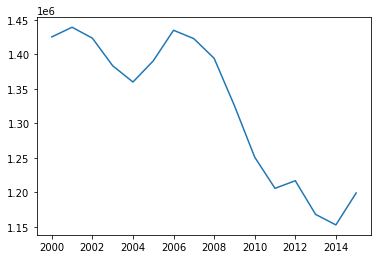

In [9]:
plt.plot(vcrime['Year'], vcrime['Violent crime'])
plt.show()

### Data Normalization and Analysis

To be able to visualize the two data sets on the same plot the values need to be normalized. For normalization, I will use the min-max normalization which rescales the values to a range of 0 to 1.


The formula is:

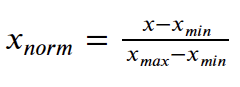

In [10]:
## Normalizing the violent crime data
vcrime['Crime Normalized'] = (vcrime['Violent crime']-vcrime['Violent crime'].min()) \
                             /(vcrime['Violent crime'].max() - vcrime['Violent crime'].min())
vcrime.head()

,Year,Violent crime,Crime Normalized
0,2000,1425486,0.951148
1,2001,1439480,1.000000
2,2002,1423677,0.944833
3,2003,1383676,0.805193
4,2004,1360088,0.722849


In [11]:
## Normalizing the violent video game sale data
vvg_grp['VG Sales Normalized'] = (vvg_grp['Total_Sales']-vvg_grp['Total_Sales'].min()) \
                                 /(vvg_grp['Total_Sales'].max() - vvg_grp['Total_Sales'].min())
vvg_grp.head()

,Year,Total_Sales,VG Sales Normalized
20,2000.0,21.79,0.000000
21,2001.0,44.92,0.260444
22,2002.0,76.50,0.616034
23,2003.0,53.86,0.361108
24,2004.0,69.41,0.536201


Next, I will join the two datasets into a new dataset. This new data set will be used to plot the normalized values of both violent crime and violent video game sales.

In [12]:
# Merging the two data sets on the 'Year' column
combined = pd.merge(vvg_grp, vcrime, how="left", on=['Year'])
combined.head()

,Year,Total_Sales,VG Sales Normalized,Violent crime,Crime Normalized
0,2000.0,21.79,0.000000,1425486,0.951148
1,2001.0,44.92,0.260444,1439480,1.000000
2,2002.0,76.50,0.616034,1423677,0.944833
3,2003.0,53.86,0.361108,1383676,0.805193
4,2004.0,69.41,0.536201,1360088,0.722849


The last step is to plot both normalized data.

<AxesSubplot:xlabel='Year'>

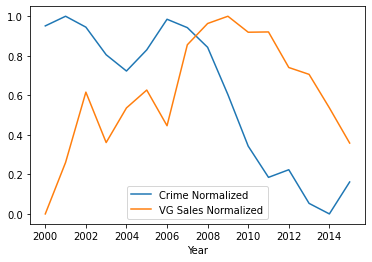

In [13]:
combined.plot(x='Year', y=['Crime Normalized','VG Sales Normalized'])

### Conclusion

As we can see from the above plot, the increase in video game sales does not correlate to an increase in violent crimes. In fact, the graphs show that, at a 1 to 2-year delay, the number of violent crimes decreases as violent video game sales increase.